# Avocado Project

In [1]:
# Importing Required libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('avocado.csv')
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0.0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015.0,Albany
1,1.0,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015.0,Albany
2,2.0,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015.0,Albany
3,3.0,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015.0,Albany
4,4.0,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015.0,Albany


In [4]:
df.tail()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
16463,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16464,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16465,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16466,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16467,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.drop(range(1517,16468),inplace=True)

In [6]:
df.drop(df.columns[0],axis=1,inplace=True)

In [7]:
df

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,conventional,2015.0,Albany
1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,conventional,2015.0,Albany
2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,conventional,2015.0,Albany
3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,conventional,2015.0,Albany
4,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,conventional,2015.0,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1512,16-10-2016,1.39,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,240.28,conventional,2016.0,Charlotte
1513,09-10-2016,1.51,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,0.00,conventional,2016.0,Charlotte
1514,02-10-2016,1.48,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,825.00,conventional,2016.0,Charlotte
1515,25-09-2016,1.47,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,0.00,conventional,2016.0,Charlotte


In [8]:
df.drop(df.columns[0],axis=1,inplace=True)

In [9]:
df

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,conventional,2015.0,Albany
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,conventional,2015.0,Albany
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,conventional,2015.0,Albany
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,conventional,2015.0,Albany
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,conventional,2015.0,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...
1512,1.39,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,240.28,conventional,2016.0,Charlotte
1513,1.51,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,0.00,conventional,2016.0,Charlotte
1514,1.48,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,825.00,conventional,2016.0,Charlotte
1515,1.47,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,0.00,conventional,2016.0,Charlotte


In [10]:
df.dtypes

AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year            float64
region           object
dtype: object

In [11]:
df.shape

(1517, 12)

In [12]:
df.columns

Index(['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags',
       'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year', 'region'],
      dtype='object')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1517 entries, 0 to 1516
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AveragePrice  1517 non-null   float64
 1   Total Volume  1517 non-null   float64
 2   4046          1517 non-null   float64
 3   4225          1517 non-null   float64
 4   4770          1517 non-null   float64
 5   Total Bags    1517 non-null   float64
 6   Small Bags    1517 non-null   float64
 7   Large Bags    1517 non-null   float64
 8   XLarge Bags   1517 non-null   float64
 9   type          1517 non-null   object 
 10  year          1517 non-null   float64
 11  region        1517 non-null   object 
dtypes: float64(10), object(2)
memory usage: 154.1+ KB


In [14]:
df.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,1517.000000,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1517.000000,1517.000000
mean,1.074990,1.601879e+06,6.464387e+05,6.114375e+05,5.040550e+04,2.935974e+05,2.487736e+05,4.264205e+04,2181.771074,2015.162821
std,0.188891,4.433143e+06,1.947614e+06,1.672906e+06,1.377812e+05,7.579765e+05,6.474765e+05,1.182157e+05,7455.712144,0.369324
min,0.490000,3.875074e+04,4.677200e+02,1.783770e+03,0.000000e+00,3.311770e+03,3.311770e+03,0.000000e+00,0.000000,2015.000000
25%,0.980000,1.474700e+05,2.040034e+04,4.147606e+04,9.112500e+02,3.620689e+04,2.972722e+04,5.407400e+02,0.000000,2015.000000
50%,1.080000,4.027919e+05,8.175117e+04,1.186649e+05,7.688170e+03,7.397906e+04,6.237569e+04,5.044350e+03,0.000000,2015.000000
75%,1.190000,9.819751e+05,3.775785e+05,4.851503e+05,2.916730e+04,1.576097e+05,1.461994e+05,2.926767e+04,401.480000,2015.000000
max,1.680000,4.465546e+07,1.893304e+07,1.895648e+07,1.381516e+06,6.736304e+06,5.893642e+06,1.121076e+06,108072.790000,2016.000000


In [15]:
df.type.unique()

array(['conventional'], dtype=object)

In [16]:
df.type.count()

1517

In [17]:
df.region.unique()

array(['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston',
       'BuffaloRochester', 'California', 'Charlotte', 'Chicago',
       'Columbus', 'DallasFtWorth', 'Denver', 'Detroit', 'GrandRapids',
       'GreatLakes', 'HarrisburgScranton', 'HartfordSpringfield',
       'Houston', 'Indianapolis', 'Jacksonville', 'LasVegas',
       'LosAngeles', 'Louisville', 'MiamiFtLauderdale', 'Midsouth',
       'Nashville', 'NewYork', 'Northeast', 'NorthernNewEngland',
       'Orlando', 'Philadelphia', 'PhoenixTucson', 'Pittsburgh', 'Plains',
       'Portland', 'RaleighGreensboro', 'RichmondNorfolk', 'Roanoke',
       'SanDiego', 'SanFrancisco', 'Seattle', 'SouthCarolina',
       'SouthCentral', 'Southeast', 'Spokane', 'StLouis', 'Syracuse',
       'Tampa', 'TotalUS', 'West', 'WestTexNewMexico'], dtype=object)

In [18]:
df.region.count()

1517

In [19]:
# Data visualizations

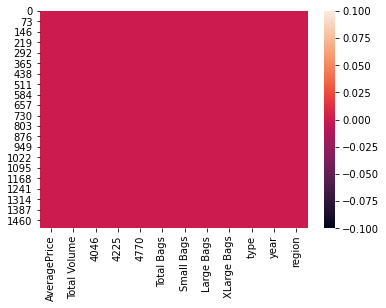

In [20]:
sns.heatmap(df.isnull())

In [21]:
df.isnull()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1512,False,False,False,False,False,False,False,False,False,False,False,False
1513,False,False,False,False,False,False,False,False,False,False,False,False
1514,False,False,False,False,False,False,False,False,False,False,False,False
1515,False,False,False,False,False,False,False,False,False,False,False,False


In [22]:
# To check Correlation

In [23]:
dfcor=df.corr()
dfcor

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
AveragePrice,1.000000,-0.140470,-0.190096,-0.092084,-0.100567,-0.111597,-0.097682,-0.177480,-0.048284,0.178683
Total Volume,-0.140470,1.000000,0.985568,0.987154,0.934347,0.967689,0.960642,0.910226,0.521717,-0.004189
4046,-0.190096,0.985568,1.000000,0.951952,0.898570,0.930395,0.922278,0.884229,0.474063,-0.040439
4225,-0.092084,0.987154,0.951952,1.000000,0.927757,0.951779,0.943988,0.900496,0.504718,-0.007254
4770,-0.100567,0.934347,0.898570,0.927757,1.000000,0.926405,0.923607,0.840523,0.646053,0.029222
Total Bags,-0.111597,0.967689,0.930395,0.951779,0.926405,1.000000,0.997341,0.911336,0.601856,0.090108
Small Bags,-0.097682,0.960642,0.922278,0.943988,0.923607,0.997341,1.000000,0.879131,0.611300,0.106382
Large Bags,-0.177480,0.910226,0.884229,0.900496,0.840523,0.911336,0.879131,1.000000,0.447779,-0.018678
XLarge Bags,-0.048284,0.521717,0.474063,0.504718,0.646053,0.601856,0.611300,0.447779,1.000000,0.218342
year,0.178683,-0.004189,-0.040439,-0.007254,0.029222,0.090108,0.106382,-0.018678,0.218342,1.000000


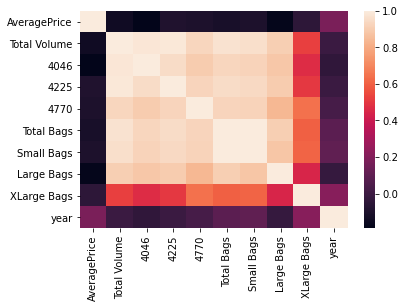

In [24]:
sns.heatmap(dfcor)

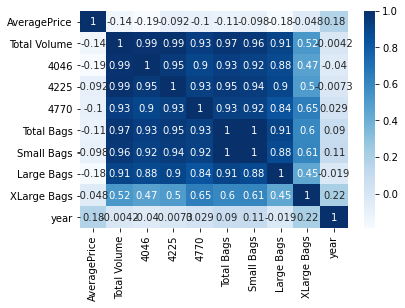

In [25]:
plt.figure(figsize=(6,4))
sns.heatmap(dfcor,cmap='Blues',annot=True)

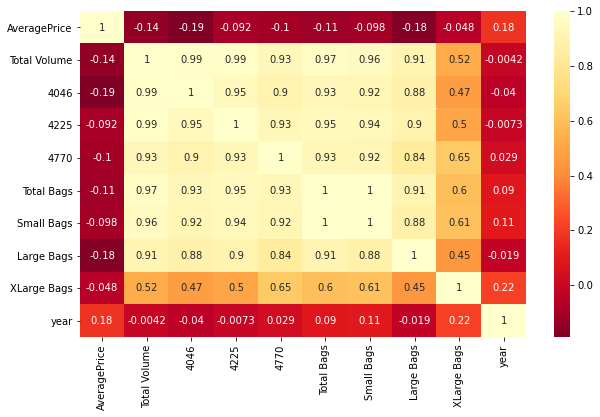

In [26]:
plt.figure(figsize=(10,6))
sns.heatmap(dfcor,cmap='YlOrRd_r',annot=True)

In [27]:
le=LabelEncoder()
df['region']=le.fit_transform(df['region'])
df['region']

0       0
1       0
2       0
3       0
4       0
       ..
1512    7
1513    7
1514    7
1515    7
1516    7
Name: region, Length: 1517, dtype: int32

In [28]:
le=LabelEncoder()
df['type']=le.fit_transform(df['type'])
df['type']

0       0
1       0
2       0
3       0
4       0
       ..
1512    0
1513    0
1514    0
1515    0
1516    0
Name: type, Length: 1517, dtype: int32

In [29]:
df

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,0,2015.0,0
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,0,2015.0,0
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,0,2015.0,0
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,0,2015.0,0
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,0,2015.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1512,1.39,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,240.28,0,2016.0,7
1513,1.51,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,0.00,0,2016.0,7
1514,1.48,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,825.00,0,2016.0,7
1515,1.47,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,0.00,0,2016.0,7


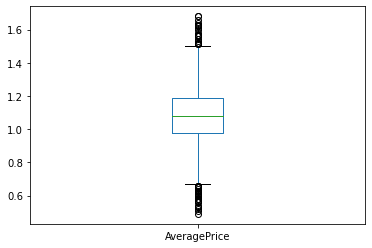

In [30]:
#univariate analysis
df['AveragePrice'].plot.box()

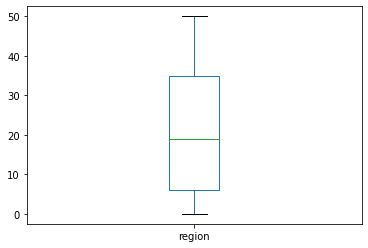

In [31]:
df['region'].plot.box()

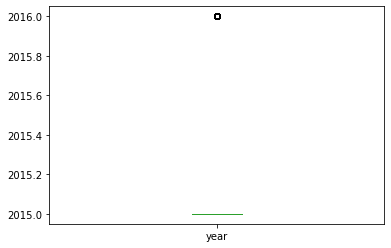

In [32]:
df['year'].plot.box()

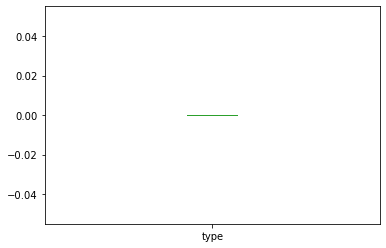

In [33]:
df['type'].plot.box()

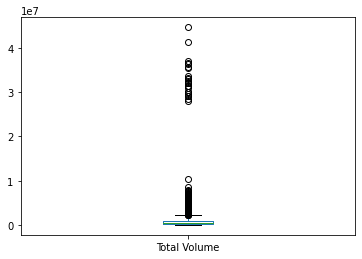

In [34]:
df['Total Volume'].plot.box()

In [35]:
collist=df.columns.values
ncol=12
nrows=10

In [36]:
plt.subplot?

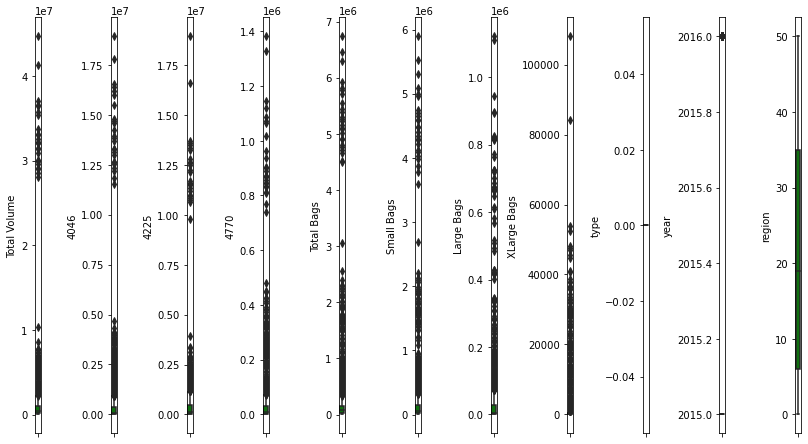

In [37]:
plt.figure(figsize=(ncol,5*ncol))
for i in range(1, len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(df[collist[i]],color='green',orient='v')
    plt.tight_layout()

In [38]:
# To check distribution of skewness

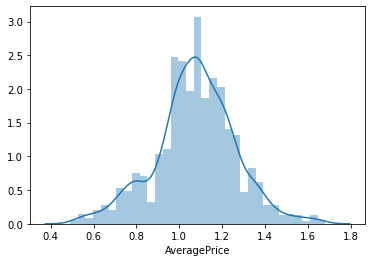

In [39]:
sns.distplot(df['AveragePrice'])

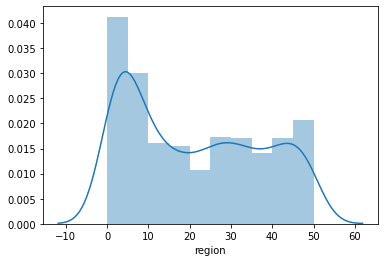

In [40]:
sns.distplot(df['region'])

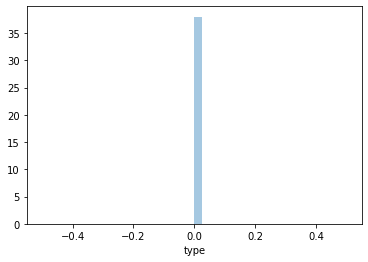

In [41]:
sns.distplot(df['type'])

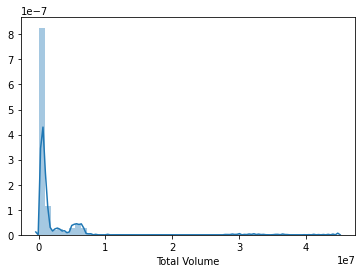

In [42]:
sns.distplot(df['Total Volume'])

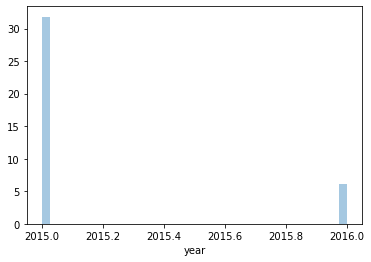

In [43]:
sns.distplot(df['year'])

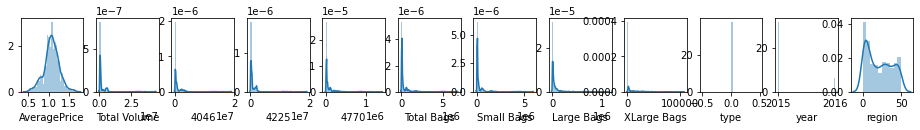

In [44]:
#plt.figure(figsize=(5*totalcol,5*totalcol))
plt.figure(figsize=(16,16))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.distplot(df[collist[i]])

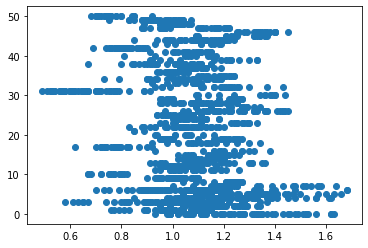

In [45]:
#bivariate analysis
plt.scatter(df['AveragePrice'],df['region'])

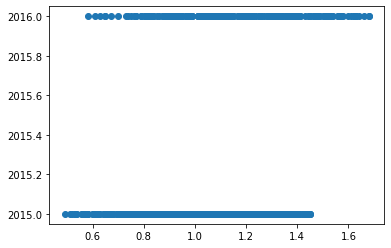

In [46]:
plt.scatter(df['AveragePrice'],df['year'])

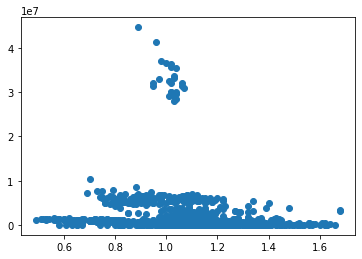

In [47]:
plt.scatter(df['AveragePrice'],df['Total Volume'])

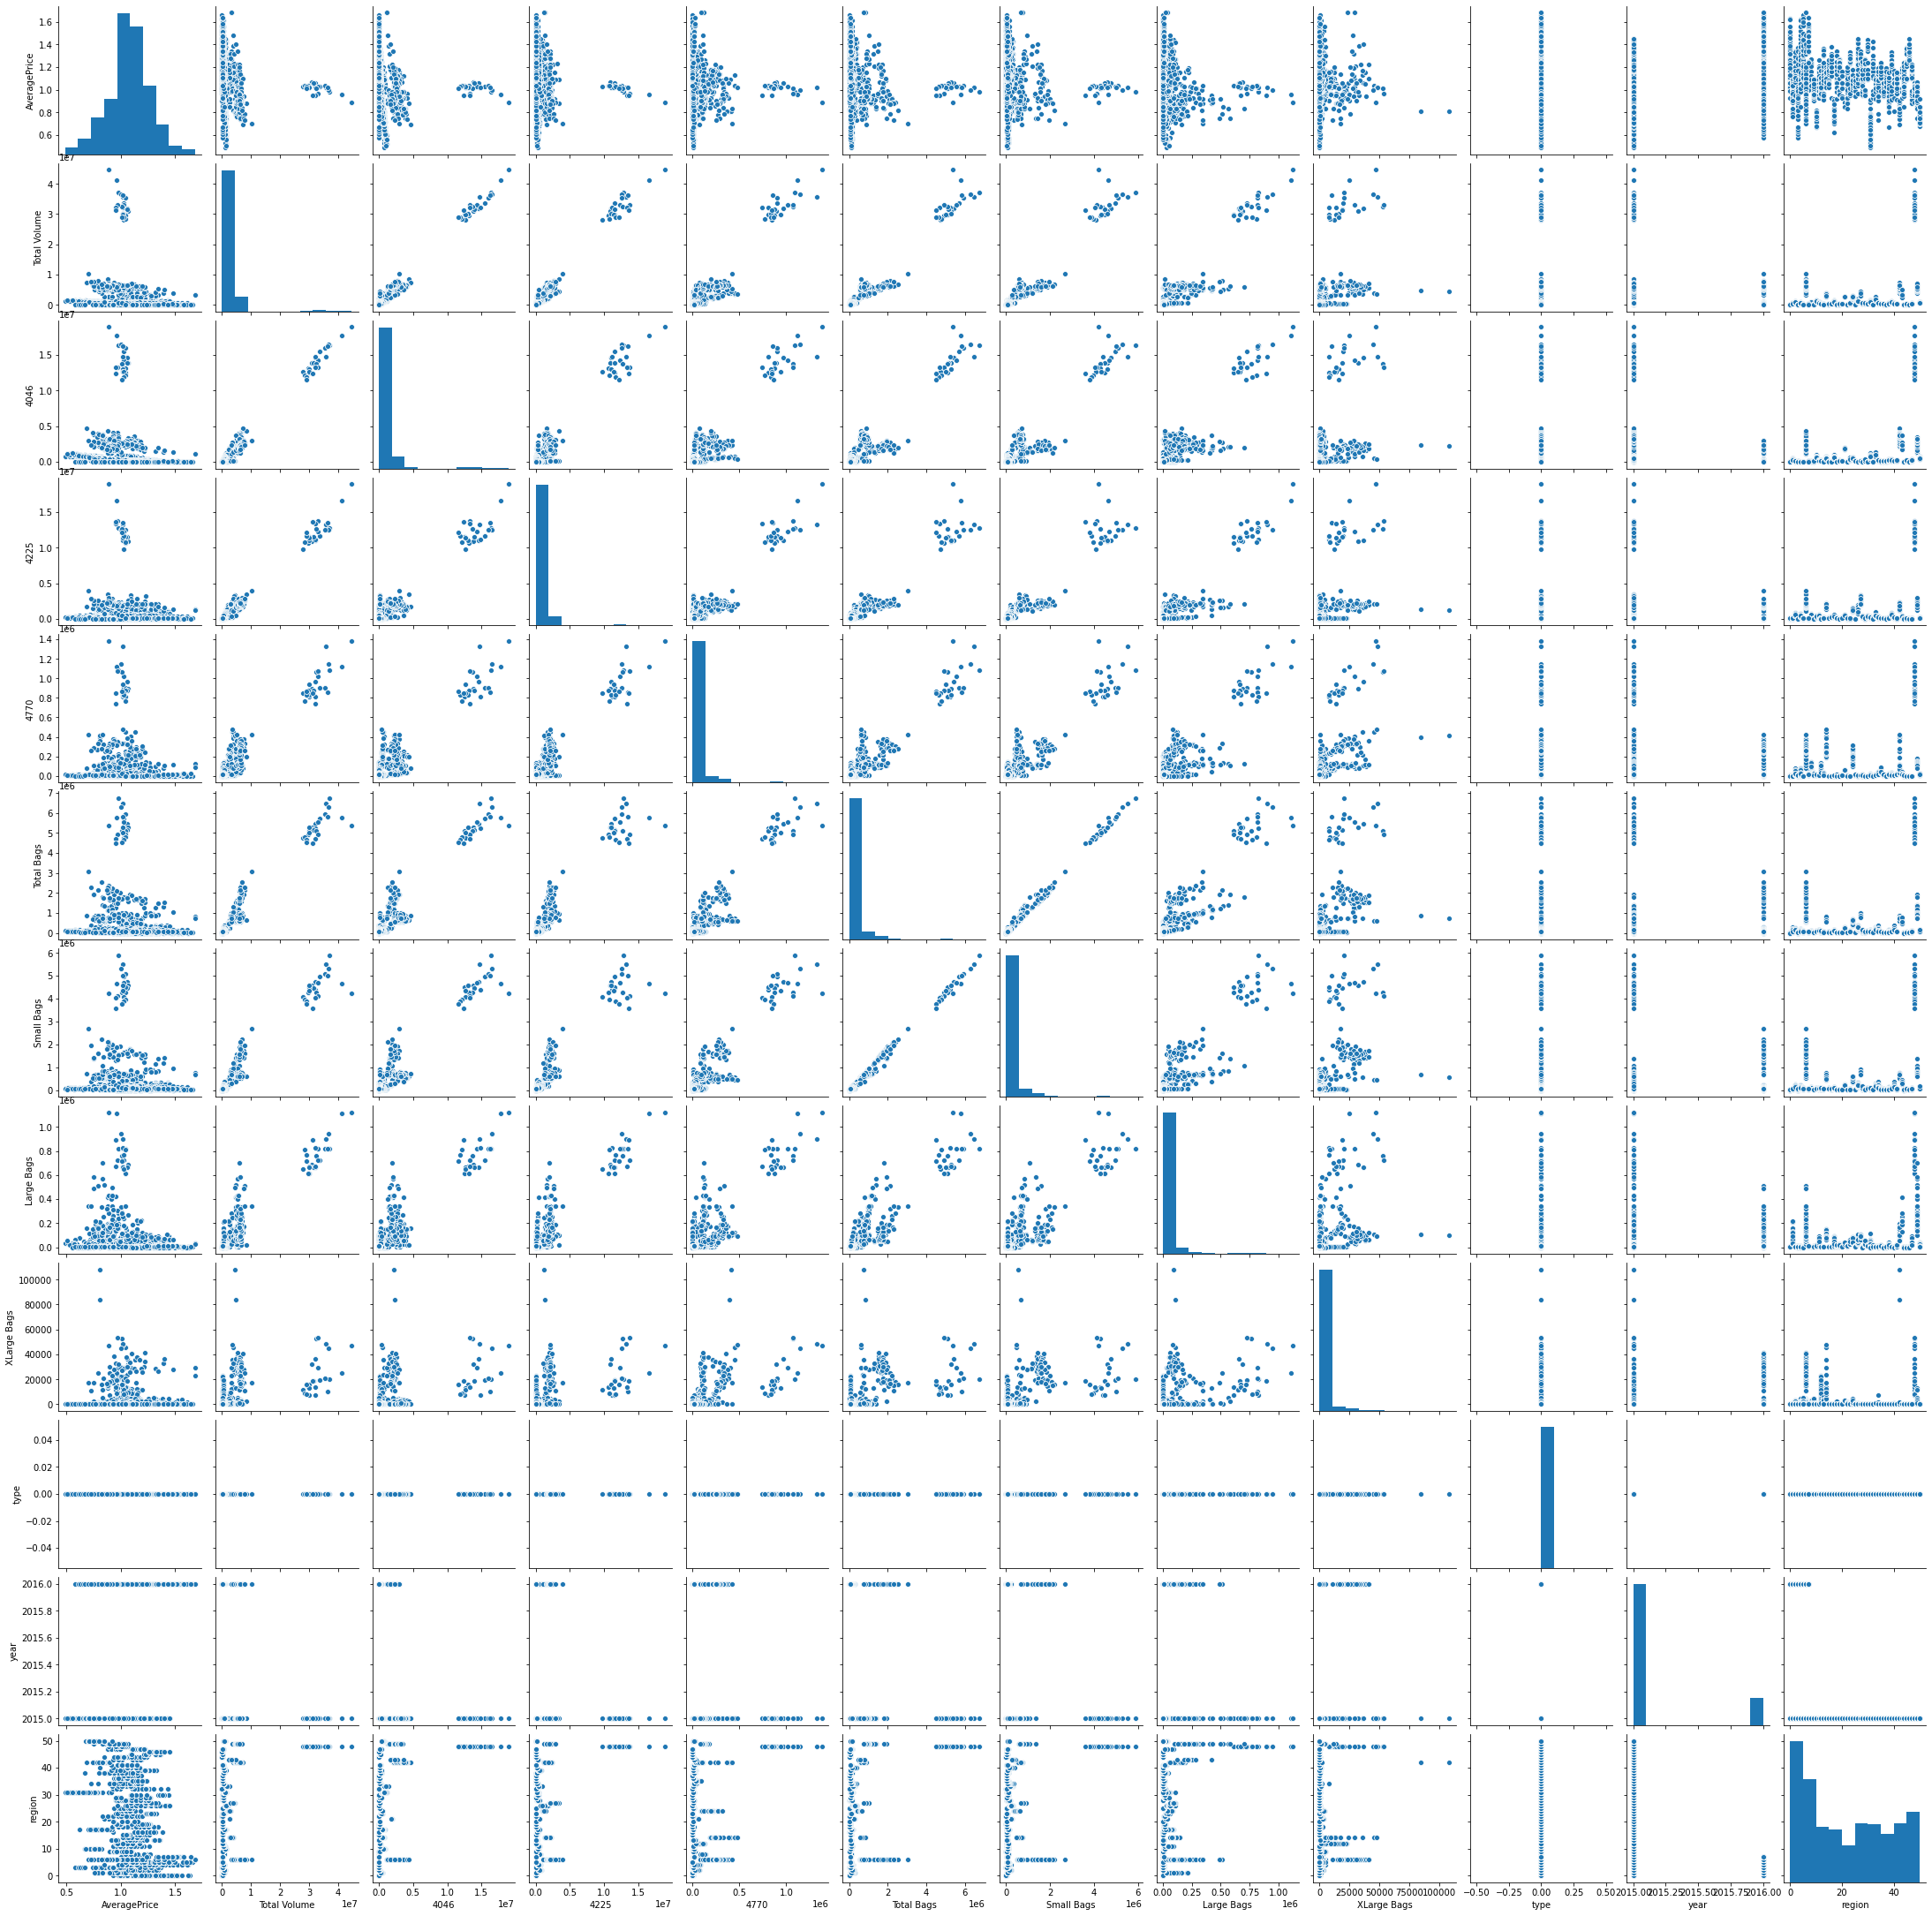

In [48]:
sns.pairplot(df)

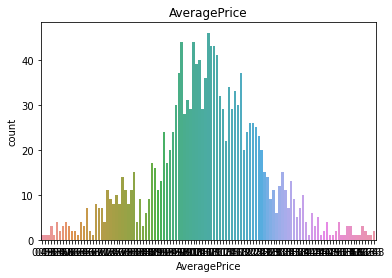

In [50]:
# Plotting the "" Column

import seaborn as sn
sn.countplot(df["AveragePrice"])
plt.title("AveragePrice")
plt.show()

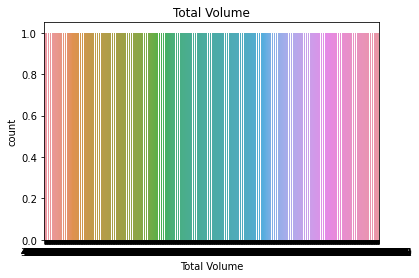

In [54]:
sn.countplot(df["Total Volume"])
plt.title("Total Volume")
plt.show()

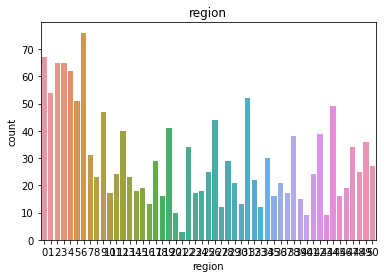

In [55]:
sn.countplot(df["region"])
plt.title("region")
plt.show()

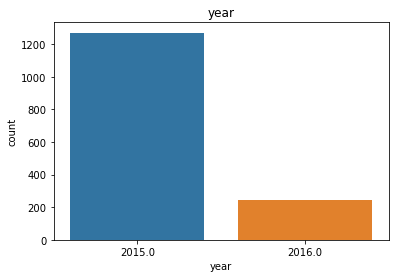

In [56]:
sn.countplot(df["year"])
plt.title("year")
plt.show()

In [57]:
df.shape

(1517, 12)

In [70]:
df.skew()

AveragePrice   -0.109444
Total Volume    6.200138
4046            6.051830
4225            6.394926
4770            5.405164
Total Bags      5.366378
Small Bags      5.355185
Large Bags      5.144495
XLarge Bags     5.775077
type            0.000000
year            1.828332
region          0.288146
dtype: float64

In [75]:
# Trating skewness via log method

for col in df.columns:
    if df[col].skew()>0.55:
        df[col]=np.log1p(df[col])

In [76]:
df.skew()

AveragePrice   -0.109444
Total Volume    0.442500
4046           -0.160268
4225            0.184436
4770           -0.355508
Total Bags      0.368284
Small Bags      0.409053
Large Bags     -0.912766
XLarge Bags     0.348073
type            0.000000
year            1.828332
region          0.288146
dtype: float64

In [78]:
df

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,1.33,2.490752,6.944801,10.905146,3.895080,2.309643,2.308573,4.545951,0.000000,0,2.152793,0
1,1.35,2.477619,6.515127,10.706381,4.083115,2.318433,2.317417,4.589955,0.000000,0,2.152793,0
2,0.93,2.540051,6.679222,11.600485,4.879007,2.303117,2.301843,4.645736,0.000000,0,2.152793,0
3,1.08,2.507737,7.032624,11.184108,4.298373,2.268791,2.266380,4.903495,0.000000,0,2.152793,0
4,1.28,2.471515,6.848515,10.688288,4.340944,2.275201,2.271857,5.291746,0.000000,0,2.152793,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1512,1.39,2.577123,10.960064,10.939651,9.771828,2.484271,2.467759,9.245288,1.869640,0,2.152851,7
1513,1.51,2.571915,10.676528,10.862658,9.874088,2.489535,2.477354,9.059234,0.000000,0,2.152851,7
1514,1.48,2.571990,10.744316,10.876052,9.725432,2.488366,2.475220,9.019078,2.043373,0,2.152851,7
1515,1.47,2.576437,10.898807,10.889203,9.769752,2.490357,2.478798,9.021509,0.000000,0,2.152851,7


In [81]:
y=df.iloc[:,0]
y

0       1.33
1       1.35
2       0.93
3       1.08
4       1.28
        ... 
1512    1.39
1513    1.51
1514    1.48
1515    1.47
1516    1.43
Name: AveragePrice, Length: 1517, dtype: float64

In [84]:
x =df.iloc[:,1:12]
x

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2.490752,6.944801,10.905146,3.895080,2.309643,2.308573,4.545951,0.000000,0,2.152793,0
1,2.477619,6.515127,10.706381,4.083115,2.318433,2.317417,4.589955,0.000000,0,2.152793,0
2,2.540051,6.679222,11.600485,4.879007,2.303117,2.301843,4.645736,0.000000,0,2.152793,0
3,2.507737,7.032624,11.184108,4.298373,2.268791,2.266380,4.903495,0.000000,0,2.152793,0
4,2.471515,6.848515,10.688288,4.340944,2.275201,2.271857,5.291746,0.000000,0,2.152793,0
...,...,...,...,...,...,...,...,...,...,...,...
1512,2.577123,10.960064,10.939651,9.771828,2.484271,2.467759,9.245288,1.869640,0,2.152851,7
1513,2.571915,10.676528,10.862658,9.874088,2.489535,2.477354,9.059234,0.000000,0,2.152851,7
1514,2.571990,10.744316,10.876052,9.725432,2.488366,2.475220,9.019078,2.043373,0,2.152851,7
1515,2.576437,10.898807,10.889203,9.769752,2.490357,2.478798,9.021509,0.000000,0,2.152851,7


In [85]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
x=scale.fit_transform(x)

In [86]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.22,random_state=55)

In [87]:
print(x_train.shape, '\t',x_test.shape)

(1183, 11) 	 (334, 11)


In [88]:
print(y_train.shape, '\t' ,y_test.shape)

(1183,) 	 (334,)


In [89]:
# Importing our Model Library

from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

#Importing Error Metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [90]:
# using algrithms via for loop

model=[LinearRegression(),DecisionTreeRegressor(),KNeighborsRegressor(),SVR(),Lasso(),Ridge(),ElasticNet()]
for m in model:
    m.fit(x_train,y_train)
    print('Score of',m, 'is :', m.score(x_train,y_train))
    predm=m.predict(x_test)
    print('Error:')
    print('Mean absolute error:',mean_absolute_error(y_test,predm))
    print('Mean squared error:',mean_squared_error(y_test,predm))
    print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,predm)))
    print("r2_score: ",r2_score(y_test,predm))
    print('*************************************************************************************************************')
    print('\n')

Score of LinearRegression() is : 0.36320588664763076
Error:
Mean absolute error: 0.11637297303955532
Mean squared error: 0.02104876878516522
Root Mean Squared Error: 0.14508193817689788
r2_score:  0.41790588128895945
*************************************************************************************************************


Score of DecisionTreeRegressor() is : 1.0
Error:
Mean absolute error: 0.07649700598802395
Mean squared error: 0.012200898203592811
Root Mean Squared Error: 0.11045767607365642
r2_score:  0.6625897144013059
*************************************************************************************************************


Score of KNeighborsRegressor() is : 0.8607573204809825
Error:
Mean absolute error: 0.06654491017964072
Mean squared error: 0.008706838323353295
Root Mean Squared Error: 0.09331044059135771
r2_score:  0.75921634978651
*************************************************************************************************************


Score of SVR() is : 0.77

In [91]:
# Cross Validate the models
from sklearn.model_selection import cross_val_score
model=[LinearRegression(),DecisionTreeRegressor(),KNeighborsRegressor(),SVR(),Lasso(),Ridge(),ElasticNet()]
for m in model:
    score=cross_val_score(m,x,y,cv=4,scoring='r2')
    print('Score of',m, 'is :')
    print("Score:",score)
    print('Mean Score:',score.mean())
    print("Standard deviation:",score.std())
    print('*************************************************************************************************************')
    print('\n')

Score of LinearRegression() is :
Score: [-0.12956904 -0.04519338  0.37741021  0.18487986]
Mean Score: 0.096881912739858
Standard deviation: 0.19868642917589593
*************************************************************************************************************


Score of DecisionTreeRegressor() is :
Score: [-4.22539839 -1.24364411  0.21540819  0.07661162]
Mean Score: -1.2942556716103608
Standard deviation: 1.7855336211382058
*************************************************************************************************************


Score of KNeighborsRegressor() is :
Score: [-0.71399492 -0.30606386  0.08323746  0.30669168]
Mean Score: -0.15753241051519573
Standard deviation: 0.3889685869258181
*************************************************************************************************************


Score of SVR() is :
Score: [-0.20755096  0.12328044  0.40526128  0.03065256]
Mean Score: 0.08791083106287637
Standard deviation: 0.2193960423591234
*************************

In [92]:
# Ridge model is giving best result so finding its best parameter using GridSearchCV
from sklearn.model_selection import GridSearchCV
ridge=Ridge()
parameters={'alpha':[0.001,0.01,0.1,1],'random_state':range(42,100)}
clf=GridSearchCV(ridge,parameters)
clf.fit(x,y)
clf.best_params_

{'alpha': 0.001, 'random_state': 42}

In [93]:
# Using Ridge model with best results

ridge = Ridge(alpha=1,random_state=42)
ridge.fit(x_train,y_train)
print('Score:',ridge.score(x_train,y_train))
predrd=ridge.predict(x_test)
print('\n')
print('Mean absolute error:', mean_absolute_error(y_test,predrd))
print('Mean squared error :', mean_squared_error(y_test,predrd))
print('Root Mean Squared error:',mean_squared_error(y_test,predrd))
print("\n")
print("r2_score:",r2_score(y_test,predrd))

Score: 0.3630706930499037


Mean absolute error: 0.11660096443520684
Mean squared error : 0.02115939674960137
Root Mean Squared error: 0.02115939674960137


r2_score: 0.4148465152937074


In [94]:
# cross Validate Ridge

score=cross_val_score(ridge,x,y,cv=4,scoring='r2')
print("Score:",score)
print('Mean Score:',score.mean())
print("Standard deviation:",score.std())

Score: [-0.11644777 -0.03372785  0.37484237  0.17308017]
Mean Score: 0.09943672665620132
Standard deviation: 0.19079474937914945


In [95]:
# Using Ensemble Technique to Boostup our score

In [96]:
# Using Random Forest

from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(n_estimators=20,random_state=59)
rf.fit(x_train,y_train)
print('Score:',rf.score(x_train,y_train))
predrf=rf.predict(x_test)
print('\n')
print('Mean absolute error:', mean_absolute_error(y_test,predrf))
print('Mean squared error :', mean_squared_error(y_test,predrf))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test,predrf)))
print('\n')
print("r2_score:",r2_score(y_test,predrf))

Score: 0.9738911626606376


Mean absolute error: 0.06238323353293413
Mean squared error : 0.007747770958083831
Root Mean Squared Error: 0.08802142329049123


r2_score: 0.7857389211762676


In [97]:
# Using Ada Boost

from sklearn.ensemble import AdaBoostRegressor
lasso=Lasso()

adb=AdaBoostRegressor(base_estimator=lasso,n_estimators=20,learning_rate=0.1,random_state=59)
adb.fit(x_train,y_train)
print('Score:',adb.score(x_train,y_train))
predadb=adb.predict(x_test)
print('\n')
print('Mean absolute error:', mean_absolute_error(y_test,predadb))
print('Mean squared error:',mean_squared_error(y_test,predadb))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,predadb)))
print('\n')
print("r2_score:",r2_score(y_test,predadb))

Score: -3.896069018605175e-05


Mean absolute error: 0.14892180136767885
Mean squared error: 0.036565055358978485
Root Mean Squared Error: 0.1912199136046727


r2_score: -0.011189960422092415


In [99]:
# Cross Validate Random Forest Regressor

score=cross_val_score(rf,x,y,cv=4,scoring='r2')
print("score:",score)
print('Mean Score:',score.mean())
print("Standard deviation:",score.std())

score: [-0.28781646 -0.30799396  0.42134317  0.20565752]
Mean Score: 0.007797567867326272
Standard deviation: 0.3151509424575063


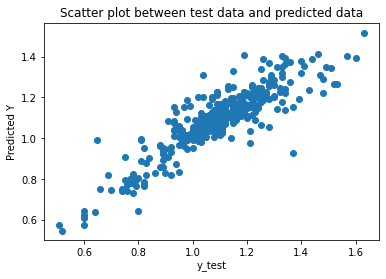

In [100]:
#plotting scatter plot between test data and predicted data for Random Forest

plt.scatter(y_test,predrf)
plt.xlabel('y_test')
plt.ylabel('Predicted Y')
plt.title("Scatter plot between test data and predicted data")
plt.show()

In [109]:
#Saving the RandomForest Regressor

In [108]:
df1=pd.DataFrame(predrf)
df1.to_csv('rf_predicton.csv')

In [127]:
# Now checking the data with region as target 

In [110]:
df

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,1.33,2.490752,6.944801,10.905146,3.895080,2.309643,2.308573,4.545951,0.000000,0,2.152793,0
1,1.35,2.477619,6.515127,10.706381,4.083115,2.318433,2.317417,4.589955,0.000000,0,2.152793,0
2,0.93,2.540051,6.679222,11.600485,4.879007,2.303117,2.301843,4.645736,0.000000,0,2.152793,0
3,1.08,2.507737,7.032624,11.184108,4.298373,2.268791,2.266380,4.903495,0.000000,0,2.152793,0
4,1.28,2.471515,6.848515,10.688288,4.340944,2.275201,2.271857,5.291746,0.000000,0,2.152793,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1512,1.39,2.577123,10.960064,10.939651,9.771828,2.484271,2.467759,9.245288,1.869640,0,2.152851,7
1513,1.51,2.571915,10.676528,10.862658,9.874088,2.489535,2.477354,9.059234,0.000000,0,2.152851,7
1514,1.48,2.571990,10.744316,10.876052,9.725432,2.488366,2.475220,9.019078,2.043373,0,2.152851,7
1515,1.47,2.576437,10.898807,10.889203,9.769752,2.490357,2.478798,9.021509,0.000000,0,2.152851,7


In [114]:
y1=df.iloc[:,11]
y1

0       0
1       0
2       0
3       0
4       0
       ..
1512    7
1513    7
1514    7
1515    7
1516    7
Name: region, Length: 1517, dtype: int32

In [116]:
x1 =df.iloc[:,0:11]
x1

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year
0,1.33,2.490752,6.944801,10.905146,3.895080,2.309643,2.308573,4.545951,0.000000,0,2.152793
1,1.35,2.477619,6.515127,10.706381,4.083115,2.318433,2.317417,4.589955,0.000000,0,2.152793
2,0.93,2.540051,6.679222,11.600485,4.879007,2.303117,2.301843,4.645736,0.000000,0,2.152793
3,1.08,2.507737,7.032624,11.184108,4.298373,2.268791,2.266380,4.903495,0.000000,0,2.152793
4,1.28,2.471515,6.848515,10.688288,4.340944,2.275201,2.271857,5.291746,0.000000,0,2.152793
...,...,...,...,...,...,...,...,...,...,...,...
1512,1.39,2.577123,10.960064,10.939651,9.771828,2.484271,2.467759,9.245288,1.869640,0,2.152851
1513,1.51,2.571915,10.676528,10.862658,9.874088,2.489535,2.477354,9.059234,0.000000,0,2.152851
1514,1.48,2.571990,10.744316,10.876052,9.725432,2.488366,2.475220,9.019078,2.043373,0,2.152851
1515,1.47,2.576437,10.898807,10.889203,9.769752,2.490357,2.478798,9.021509,0.000000,0,2.152851


In [117]:
scale = StandardScaler()
x1=scale.fit_transform(x1)

In [118]:
x1_train,x1_test,y1_train,y1_test = train_test_split(x1,y1,test_size=.22,random_state=55)

In [119]:
print(x1_train.shape, '\t',x1_test.shape)

(1183, 11) 	 (334, 11)


In [121]:
print(y1_train.shape, '\t' ,y1_test.shape)

(1183,) 	 (334,)


In [122]:
# using algrithms via for loop

model=[LinearRegression(),DecisionTreeRegressor(),KNeighborsRegressor(),SVR(),Lasso(),Ridge(),ElasticNet()]
for m in model:
    m.fit(x1_train,y1_train)
    print('Score of',m, 'is :', m.score(x1_train,y1_train))
    predm=m.predict(x1_test)
    print('Error:')
    print('Mean absolute error:',mean_absolute_error(y1_test,predm))
    print('Mean squared error:',mean_squared_error(y1_test,predm))
    print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y1_test,predm)))
    print("r2_score: ",r2_score(y1_test,predm))
    print('*************************************************************************************************************')
    print('\n')

Score of LinearRegression() is : 0.43829350939038914
Error:
Mean absolute error: 9.946209054556602
Mean squared error: 140.83354179309623
Root Mean Squared Error: 11.86733086220723
r2_score:  0.4339925134489726
*************************************************************************************************************


Score of DecisionTreeRegressor() is : 1.0
Error:
Mean absolute error: 2.1077844311377247
Mean squared error: 45.67664670658683
Root Mean Squared Error: 6.758450022496787
r2_score:  0.8164263735235989
*************************************************************************************************************


Score of KNeighborsRegressor() is : 0.9527366019488114
Error:
Mean absolute error: 1.584431137724551
Mean squared error: 21.357125748502995
Root Mean Squared Error: 4.621377040288207
r2_score:  0.9141660934536194
*************************************************************************************************************


Score of SVR() is : 0.4918504290414415
E

In [123]:
# Cross Validate the models
from sklearn.model_selection import cross_val_score
model=[LinearRegression(),DecisionTreeRegressor(),KNeighborsRegressor(),SVR(),Lasso(),Ridge(),ElasticNet()]
for m in model:
    score=cross_val_score(m,x1,y1,cv=4,scoring='r2')
    print('Score of',m, 'is :')
    print("Score:",score)
    print('Mean Score:',score.mean())
    print("Standard deviation:",score.std())
    print('*************************************************************************************************************')
    print('\n')

Score of LinearRegression() is :
Score: [-32.79601695  -4.84052388 -17.19504015   0.4986374 ]
Mean Score: -13.583235894791379
Standard deviation: 12.815130265009547
*************************************************************************************************************


Score of DecisionTreeRegressor() is :
Score: [-38.96583034 -11.76392498 -33.41993887  -0.06502992]
Mean Score: -21.05368102562546
Standard deviation: 15.816071485127653
*************************************************************************************************************


Score of KNeighborsRegressor() is :
Score: [-45.47689379  -8.67130994 -24.98891684   0.08171351]
Mean Score: -19.763851764125032
Standard deviation: 17.359095458213197
*************************************************************************************************************


Score of SVR() is :
Score: [-3.75858977e+01 -4.67296872e+00 -3.01156135e+01  3.02114090e-02]
Mean Score: -18.086067131650417
Standard deviation: 16.07065754828002

In [124]:
# Ridge model is giving best result so finding its best parameter using GridSearchCV
from sklearn.model_selection import GridSearchCV
ridge=Ridge()
parameters={'alpha':[0.001,0.01,0.1,1],'random_state':range(42,100)}
clf=GridSearchCV(ridge,parameters)
clf.fit(x1,y1)
clf.best_params_

{'alpha': 1, 'random_state': 42}

In [125]:
# Using Ridge model with best results

ridge = Ridge(alpha=1,random_state=42)
ridge.fit(x1_train,y1_train)
print('Score:',ridge.score(x1_train,y1_train))
predrd=ridge.predict(x1_test)
print('\n')
print('Mean absolute error:', mean_absolute_error(y1_test,predrd))
print('Mean squared error :', mean_squared_error(y1_test,predrd))
print('Root Mean Squared error:',mean_squared_error(y1_test,predrd))
print("\n")
print("r2_score:",r2_score(y1_test,predrd))

Score: 0.4380494612598804


Mean absolute error: 9.964987257127627
Mean squared error : 140.8669128560512
Root Mean Squared error: 140.8669128560512


r2_score: 0.43385839574358664


In [128]:
# cross Validate Ridge

score=cross_val_score(ridge,x1,y1,cv=4,scoring='r2')
print("Score:",score)
print('Mean Score:',score.mean())
print("Standard deviation:",score.std())

Score: [-32.91448294  -4.63495898 -17.37720261   0.13744459]
Mean Score: -13.69729998390397
Standard deviation: 12.809839832399991


In [129]:
# Using Ensemble Technique to Boostup our score

In [130]:
# Using Random Forest

from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(n_estimators=20,random_state=59)
rf.fit(x1_train,y1_train)
print('Score:',rf.score(x1_train,y1_train))
predrf=rf.predict(x1_test)
print('\n')
print('Mean absolute error:', mean_absolute_error(y1_test,predrf))
print('Mean squared error :', mean_squared_error(y1_test,predrf))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y1_test,predrf)))
print('\n')
print("r2_score:",r2_score(y1_test,predrf))

Score: 0.9814346555332517


Mean absolute error: 2.444760479041916
Mean squared error : 21.688106287425146
Root Mean Squared Error: 4.657049096522941


r2_score: 0.9128358885851807


In [131]:
# Using Ada Boost

from sklearn.ensemble import AdaBoostRegressor
lasso=Lasso()

adb=AdaBoostRegressor(base_estimator=lasso,n_estimators=20,learning_rate=0.1,random_state=59)
adb.fit(x1_train,y1_train)
print('Score:',adb.score(x1_train,y1_train))
predadb=adb.predict(x1_test)
print('\n')
print('Mean absolute error:', mean_absolute_error(y1_test,predadb))
print('Mean squared error:',mean_squared_error(y1_test,predadb))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y1_test,predadb)))
print('\n')
print("r2_score:",r2_score(y1_test,predadb))

Score: 0.3285116424571033


Mean absolute error: 10.921676578178806
Mean squared error: 172.76290562025392
Root Mean Squared Error: 13.143930371858104


r2_score: 0.3056689710819601


In [134]:
# Cross Validate RandomForest Regressor

score=cross_val_score(rf,x1,y1,cv=4,scoring='r2')
print("score:",score)
print('Mean Score:',score.mean())
print("Standard deviation:",score.std())

score: [-43.48776302  -4.25040522 -22.5574672    0.23607507]
Mean Score: -17.51489009398123
Standard deviation: 17.255876066863415


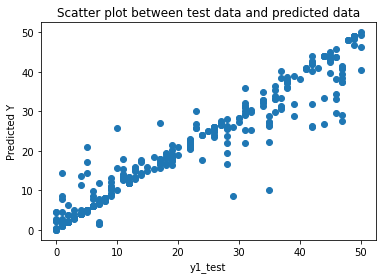

In [136]:
#plotting scatter plot between test data and predicted data for Ada Boost

plt.scatter(y1_test,predrf)
plt.xlabel('y1_test')
plt.ylabel('Predicted Y')
plt.title("Scatter plot between test data and predicted data")
plt.show()

In [137]:
#Saving the RandomForest Regressor

In [141]:
df2=pd.DataFrame(predrf)
df2.to_csv('rf1_predicton.csv')